In [6]:
import tensorflow as tf
import numpy as np
# import pandas as pd
DESIRED_ACCURACY = 0.9
BATCH_SIZE = 10
image_height = 150
image_width = 150

In [7]:
class mCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc') >= DESIRED_ACCURACY):
            print("\nReached desired accuracy so cancelling training!")
            self.model.stop_training = True

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.0,
                                   zoom_range=0.1,
                                rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    '.../pneumonia/train',
    target_size = (image_width, image_height),
    batch_size = BATCH_SIZE,
    class_mode = 'binary')
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    '.../pneumonia/val',
    target_size = (image_width, image_height),
    batch_size = BATCH_SIZE,
    class_mode = 'binary')

Found 4824 images belonging to 2 classes.
Found 1016 images belonging to 2 classes.


In [9]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (image_width,image_height,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation = 'relu'),
   tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [10]:
callbacks = mCallback()
history = model.fit_generator(
    train_generator,
    epochs = 100,
    verbose = 1,
    validation_data = validation_generator,
    #callbacks = [callbacks]
    )
    # model fitting


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 483 steps, validate for 102 steps
Epoch 1/100
201/483 [===========>..................] - ETA: 1:00 - loss: 0.5727 - acc: 0.7588

KeyboardInterrupt: 

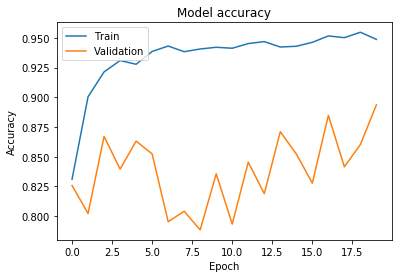

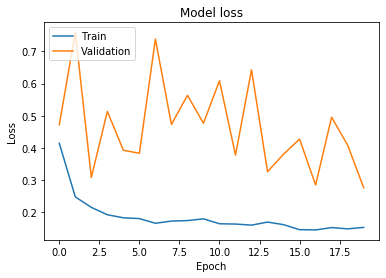

In [49]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()